In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

ticker = "^GSPC"
start_date = '2000-01-01 9:00:00'
end_date = '2024-12-31 15:00:00'

start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')

stock_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

display(stock_data.head())

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,


In [ ]:
stock_data.shape

(0, 6)

In [ ]:
# prompt: ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# ... (your existing code)

# Assuming 'Close' price is your target variable
data = stock_data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))


# Split data into training and testing sets
train_data, test_data = train_test_split(data, train_size=0.8, shuffle=False)

# ... (rest of your code using train_data and test_data)


In [ ]:
# prompt: --------------------------------------------------------------------------
# NameError                                 Traceback (most recent call last)
# Cell In[70], line 12
#       9     model.compile(optimizer=optimizer, loss='mean_squared_error')
#      10     return model
# ---> 12 model = KerasRegressor(build_fn=build_model, verbose=0)
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from keras.wrappers.scikit_learn import KerasRegressor # Correct import

import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam


ticker = "^GSPC"
start_date = '2000-01-01 9:00:00'
end_date = '2024-12-31 15:00:00'

start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')

stock_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

display(stock_data.head())
stock_data.shape


# ... (your existing code)

# Assuming 'Close' price is your target variable
data = stock_data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))


# Split data into training and testing sets
train_data, test_data = train_test_split(data, train_size=0.8, shuffle=False)

# ... (rest of your code using train_data and test_data)

def build_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1)) # Prediction of the next closing price

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=build_model, verbose=0)


<ipython-input-2-30f1bf856c7e>:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.ylim(float(stock_data['Close'].min()) - 0.1, float(stock_data['Close'].max()) + 0.1)


(676.430029296875, 6090.37001953125)

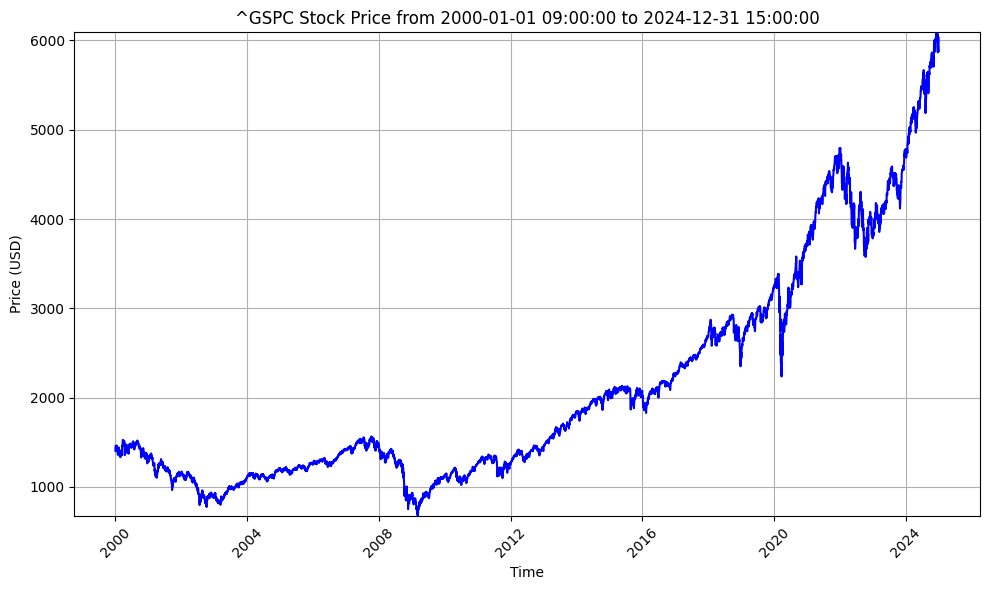

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{ticker} Close Price', color='blue')
plt.title(f'{ticker} Stock Price from {start_date} to {end_date}')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Adjust y-axis to start from a reasonable digit
# plt.ylim(stock_data['Close'].min() - 5, stock_data['Close'].max() + 5)
plt.ylim(float(stock_data['Close'].min()) - 0.1, float(stock_data['Close'].max()) + 0.1)




In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------- DATA ACQUISITION ----------------------------

# Define stock ticker and date range
ticker = "^GSPC"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Fetch historical data from Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Reset index to get Date as a column

# Display initial few rows
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-01-02  3257.850098  3258.139893  3235.530029  3244.669922  3459930000
2020-01-03  3234.850098  3246.149902  3222.340088  3226.360107  3484700000
2020-01-06  3246.280029  3246.840088  3214.639893  3217.550049  3702460000
2020-01-07  3237.179932  3244.909912  3232.429932  3241.860107  3435910000
2020-01-08  3253.050049  3267.070068  3236.669922  3238.590088  3726840000


In [ ]:

# ---------------------------- DATA CLEANING ----------------------------

# Check for missing values
print("\nMissing Values Before Processing:")
print(df.isnull().sum())

# Fill missing values using forward-fill method
df.fillna(method="ffill", inplace=True)

# Drop any remaining NaN values
df.dropna(inplace=True)

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Check again for missing values
print("\nMissing Values After Processing:")
print(df.isnull().sum())
df = df.reset_index()  # This line has been added





Missing Values Before Processing:
Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64

Missing Values After Processing:
Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


<ipython-input-39-78dc14210c59>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [ ]:
!pip install --upgrade ta -q

In [ ]:
import ta
# ---------------------------- FEATURE ENGINEERING ----------------------------

# 1️ Create Daily Returns
df["Daily Return"] = df["Close"].pct_change()

# 2️ Create Moving Averages (SMA & EMA)
df["SMA_50"] = df["Close"].rolling(window=50).mean()  # 50-day Simple Moving Average
df["SMA_200"] = df["Close"].rolling(window=200).mean()  # 200-day SMA
df["EMA_21"] = df["Close"].ewm(span=21, adjust=False).mean()  # 21-day Exponential Moving Average

# 3️ Calculate Relative Strength Index (RSI)
df["RSI_14"] = ta.momentum.rsi(df["Close"].squeeze(), window=14)

# 4️ Compute Bollinger Bands (Upper and Lower Bands)
df["BB_Middle"] = df["Close"].rolling(window=20).mean().squeeze()  # Squeeze to ensure Series
df["BB_Upper"] = df["BB_Middle"] + (2 * df["Close"].rolling(window=20).std().squeeze()) # Squeeze to ensure Series
df["BB_Lower"] = df["BB_Middle"] - (2 * df["Close"].rolling(window=20).std().squeeze()) # Squeeze to ensure Series

# Drop NaN values from feature columns (rolling calculations may introduce NaNs)
df.dropna(inplace=True)

# Display processed dataset
print("\nProcessed Data Sample:")
display(df.head())




Processed Data Sample:


Price,Date,Close,High,Low,Open,Volume,Daily Return,SMA_50,SMA_200,EMA_21,RSI_14,BB_Middle,BB_Upper,BB_Lower
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,,,
199,2020-10-15,3483.340088,3489.080078,3440.889893,3453.719971,3724550000,-0.001528,3396.664604,3122.449099,3418.162459,58.600505,3380.425000,3556.290725,3204.559275
200,2020-10-16,3483.810059,3515.760010,3480.449951,3493.500000,4688030000,0.000135,3399.357607,3123.578899,3424.130423,58.644511,3388.642004,3567.841481,3209.442528
201,2020-10-19,3426.919922,3502.419922,3419.929932,3493.659912,4091080000,-0.016330,3400.870405,3124.539248,3424.384013,51.507187,3395.934998,3568.446915,3223.423080
202,2020-10-20,3443.120117,3476.929932,3435.649902,3439.379883,3917850000,0.004727,3402.523408,3125.523448,3426.087296,53.251962,3402.312500,3571.717764,3232.907236
203,2020-10-21,3435.560059,3464.860107,3433.060059,3439.909912,4103960000,-0.002196,3404.560811,3126.515349,3426.948456,52.306151,3412.244507,3563.097507,3261.391507


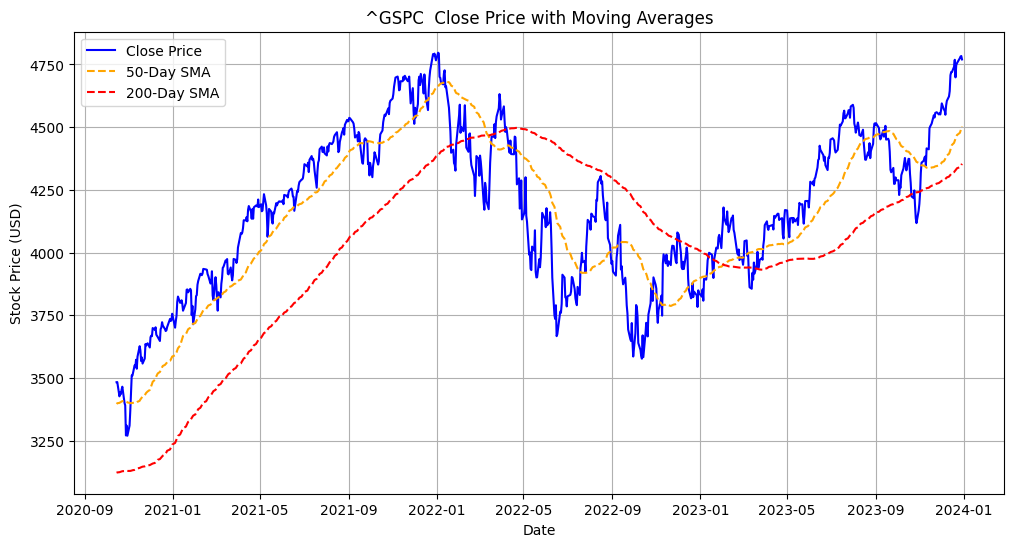

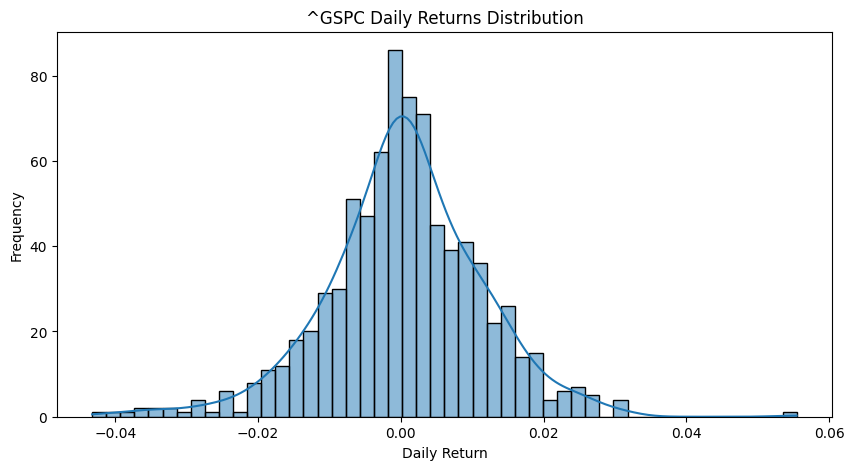

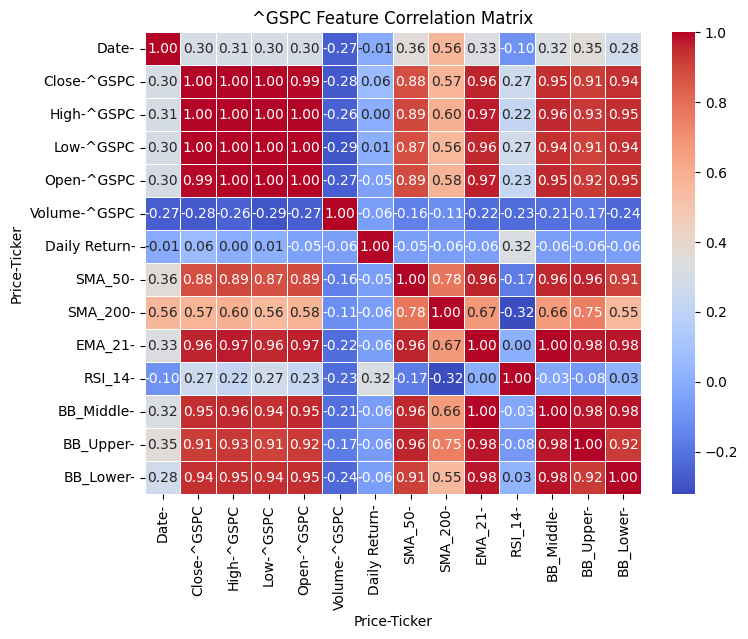

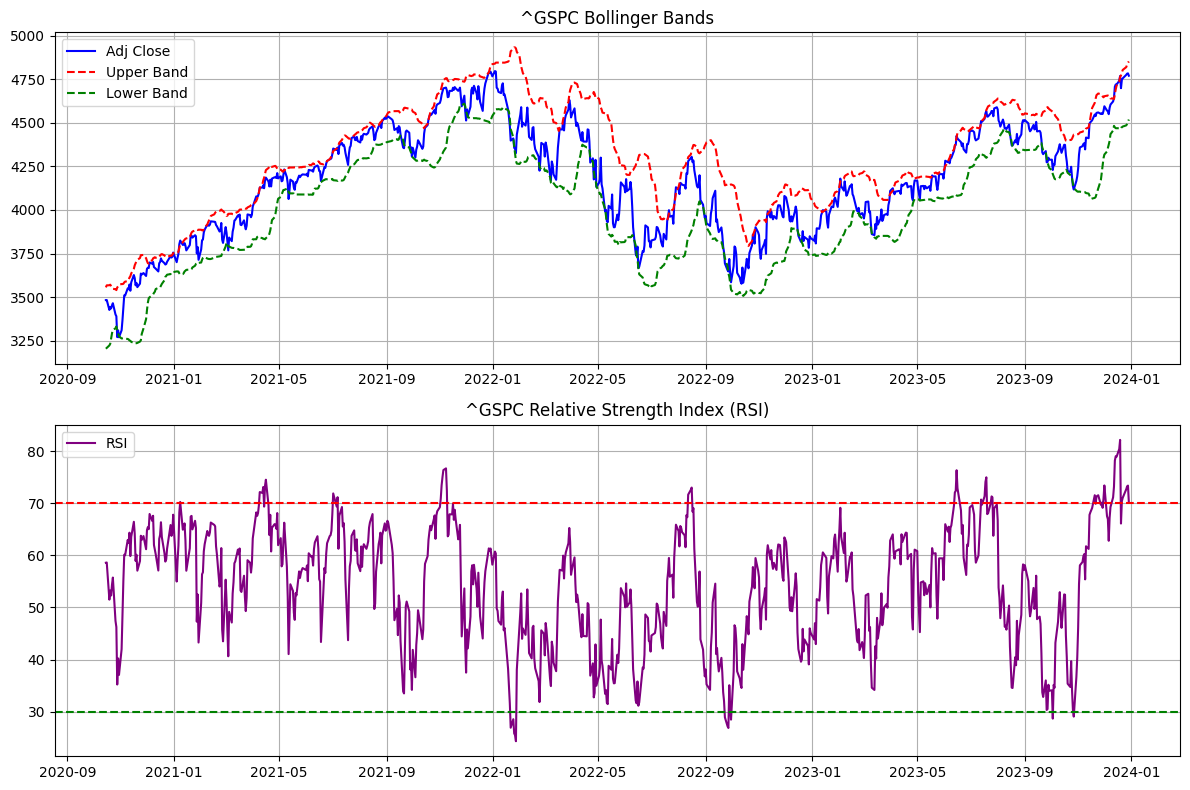

In [ ]:
# ---------------------------- EXPLORATORY DATA ANALYSIS (EDA) ----------------------------

# 1️⃣ Plot Adjusted Close Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.plot(df["Date"], df["SMA_50"], label="50-Day SMA", linestyle="dashed", color="orange")
plt.plot(df["Date"], df["SMA_200"], label="200-Day SMA", linestyle="dashed", color="red")
plt.title(f"{ticker}  Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Plot Daily Returns Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Daily Return"], bins=50, kde=True)
plt.title(f"{ticker} Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"{ticker} Feature Correlation Matrix")
plt.show()

# 4️⃣ RSI & Bollinger Bands Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot Bollinger Bands
ax[0].plot(df["Date"], df["Close"], label="Adj Close", color="blue")
ax[0].plot(df["Date"], df["BB_Upper"], label="Upper Band", linestyle="dashed", color="red")
ax[0].plot(df["Date"], df["BB_Lower"], label="Lower Band", linestyle="dashed", color="green")
ax[0].set_title(f"{ticker} Bollinger Bands")
ax[0].legend()
ax[0].grid()

# Plot RSI
ax[1].plot(df["Date"], df["RSI_14"], label="RSI", color="purple")
ax[1].axhline(70, linestyle="dashed", color="red")  # Overbought threshold
ax[1].axhline(30, linestyle="dashed", color="green")  # Oversold threshold
ax[1].set_title(f"{ticker} Relative Strength Index (RSI)")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()